# Testing the models webcam feed with MediaPipe hand keypoints

- Testing on 10 letters

In [ ]:
# Get labels

import io
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
u = 'https://raw.githubusercontent.com/rrsr28/Sign-Language-Recognition/main/Dataset.csv'
#Raw url: 'https://github.com/rrsr28/Sign-Language-Recognition/blob/main/Dataset.csv'

df= pd.read_csv(u)

y = df.iloc[:, -1]

y = np.array(y)

original_labels = np.unique(y)

encoder = LabelEncoder()
y = encoder.fit_transform(y) # Convert labels to numerical values

numerical_labels = np.unique(y)

for i in np.arange(len(original_labels)):
  print(f'{numerical_labels[i]}: Original label {original_labels[i]}')

0: Original label A
1: Original label B
2: Original label C
3: Original label D
4: Original label E
5: Original label F
6: Original label G
7: Original label H
8: Original label I
9: Original label J
10: Original label K
11: Original label L
12: Original label M
13: Original label N
14: Original label No Hand Detected
15: Original label O
16: Original label P
17: Original label Q
18: Original label R
19: Original label S
20: Original label T
21: Original label U
22: Original label V
23: Original label W
24: Original label X
25: Original label Y
26: Original label Z


In [2]:
original_labels[2]

'C'

In [ ]:
# Run test with MediaPipe

import cv2
import mediapipe as mp
import numpy as np
import pickle

models_list = ['models/model_AdaBoostClassifier.pkl', 'models/model_BaggingClassifier.pkl',
                'models/model_logisticregression.pkl', 'models/model_mlp.pkl', 
                'models/model_RandomForestClassifier.pkl', 
                'models/model_svm.pkl']


#hand.py
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)
with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                handIndex = results.multi_hand_landmarks.index(hand_landmarks)
                handLabel = results.multi_handedness[handIndex].classification[0].label

                handLandmarks = []
                for landmarks in hand_landmarks.landmark:
                    handLandmarks.append([landmarks.x, landmarks.y, landmarks.z])

                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
                
                # Load model
                for idx, file_name in enumerate(models_list):
                    with open(file_name, 'rb') as f:
                        model = pickle.load(f)

                        model_name = type(model).__name__ # Model name
                        
                        # Predict
                        X_frame = np.array(handLandmarks)
                        X_frame = np.ravel(X_frame)
                        #X_frame = X_frame.reshape(1, -1)
                        predict = model.predict([X_frame])
                        
                        # Display Text
                        pt_x = 50
                        pt_y = 70
                        pt_h = 30
                        color = (130,255,0)
                        text_top = 'Predicted ASL Letter'
                        text_bottom = f'Letter: {original_labels[predict]}, Model: {model_name}'
                        cv2.putText(image, text_top, (pt_x, pt_y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, thickness=1)
                        cv2.putText(image, text_bottom, (pt_x, pt_y+25+pt_h+(idx*50)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, thickness=2)

                        print(f'Predicted Letter: {original_labels[predict]}, Model: {model_name}')


        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()

2024-11-09 13:31:29.870288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-09 13:31:29.890511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-09 13:31:29.896770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 13:31:29.910592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
libEGL warning: MESA-LOADER: failed

Predicted Letter: ['U'], Model: AdaBoostClassifier
Predicted Letter: ['V'], Model: BaggingClassifier
Predicted Letter: ['J'], Model: LogisticRegression
Predicted Letter: ['J'], Model: MLPClassifier
Predicted Letter: ['J'], Model: RandomForestClassifier
Predicted Letter: ['J'], Model: SVC
Predicted Letter: ['W'], Model: AdaBoostClassifier
Predicted Letter: ['V'], Model: BaggingClassifier
Predicted Letter: ['J'], Model: LogisticRegression
Predicted Letter: ['J'], Model: MLPClassifier
Predicted Letter: ['W'], Model: RandomForestClassifier
Predicted Letter: ['J'], Model: SVC
Predicted Letter: ['W'], Model: AdaBoostClassifier
Predicted Letter: ['B'], Model: BaggingClassifier
Predicted Letter: ['B'], Model: LogisticRegression
Predicted Letter: ['B'], Model: MLPClassifier
Predicted Letter: ['W'], Model: RandomForestClassifier
Predicted Letter: ['B'], Model: SVC
Predicted Letter: ['W'], Model: AdaBoostClassifier
Predicted Letter: ['B'], Model: BaggingClassifier
Predicted Letter: ['B'], Model: 

## A

![Screenshot from 2024-11-09 13-42-54.png](<attachment:Screenshot from 2024-11-09 13-42-54.png>)


Predicted Letter: ['T'], Model: AdaBoostClassifier \
Predicted Letter: ['G'], Model: BaggingClassifier \
Predicted Letter: ['N'], Model: LogisticRegression \
Predicted Letter: ['M'], Model: MLPClassifier \
Predicted Letter: ['G'], Model: RandomForestClassifier \
Predicted Letter: ['T'], Model: SVC


Correct prediction: \
NONE
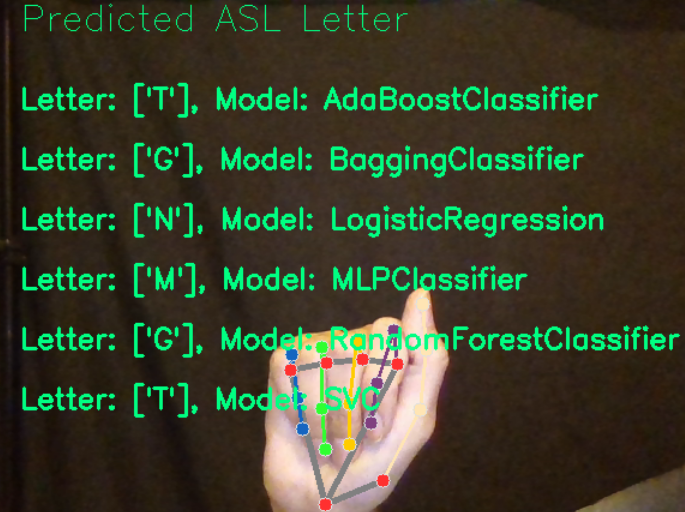

## B

![Screenshot from 2024-11-09 13-31-50.png](<attachment:Screenshot from 2024-11-09 13-31-50.png>)

Predicted Letter: ['W'], Model: AdaBoostClassifier \
Predicted Letter: ['B'], Model: BaggingClassifier \
Predicted Letter: ['B'], Model: LogisticRegression \
Predicted Letter: ['B'], Model: MLPClassifier \
Predicted Letter: ['B'], Model: RandomForestClassifier \
Predicted Letter: ['B'], Model: SVC

Correct prediction: \
All models except for RandomForestClassifier
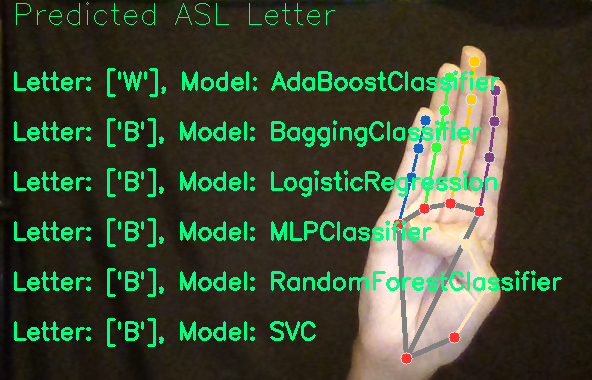

## C

![Screenshot from 2024-11-09 13-43-09.png](<attachment:Screenshot from 2024-11-09 13-43-09.png>)

Predicted Letter: ['B'], Model: AdaBoostClassifier \
Predicted Letter: ['R'], Model: BaggingClassifier \
Predicted Letter: ['C'], Model: LogisticRegression \
Predicted Letter: ['C'], Model: MLPClassifier \
Predicted Letter: ['C'], Model: RandomForestClassifier \
Predicted Letter: ['C'], Model: SVC

Correct prediction: \
All models except for AdaBoostClassifier, BaggingClassifier
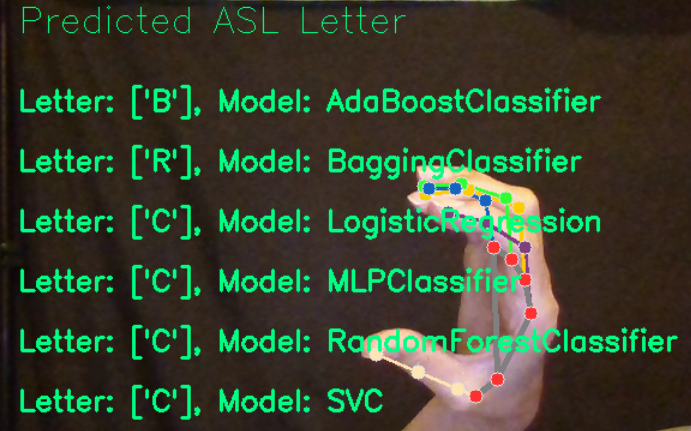

## D

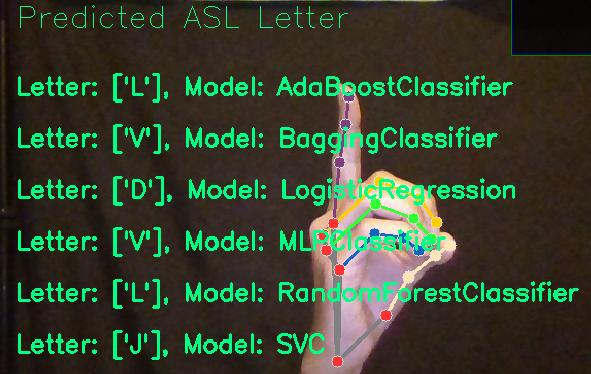

Predicted Letter: ['L'], Model: AdaBoostClassifier \
Predicted Letter: ['V'], Model: BaggingClassifier \
Predicted Letter: ['D'], Model: LogisticRegression \
Predicted Letter: ['V'], Model: MLPClassifier \
Predicted Letter: ['L'], Model: RandomForestClassifier \
Predicted Letter: ['J'], Model: SVC

Correct prediction: \
LogisticRegression model

--> SVC predicted wrong!

## E

![Screenshot from 2024-11-09 14-01-49.png](<attachment:Screenshot from 2024-11-09 14-01-49.png>)

Predicted Letter: ['L'], Model: AdaBoostClassifier \
Predicted Letter: ['M'], Model: BaggingClassifier \
Predicted Letter: ['E'], Model: LogisticRegression \
Predicted Letter: ['O'], Model: MLPClassifier \
Predicted Letter: ['O'], Model: RandomForestClassifier \
Predicted Letter: ['E'], Model: SVC


Correct prediction: \
LogisticRegression model
SVC model
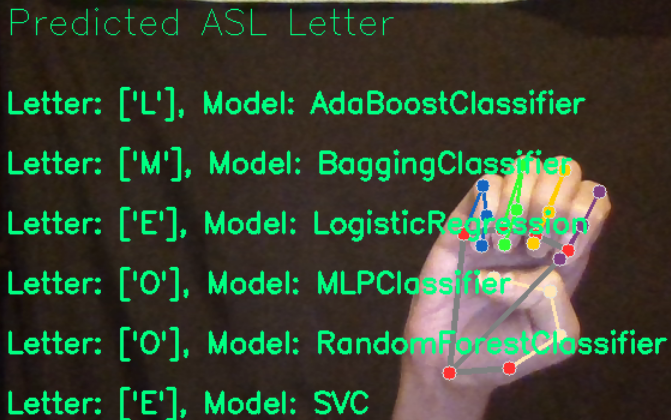

## F

![Screenshot from 2024-11-09 13-55-41.png](<attachment:Screenshot from 2024-11-09 13-55-41.png>)

Predicted Letter: ['W'], Model: AdaBoostClassifier \
Predicted Letter: ['V'], Model: BaggingClassifier \
Predicted Letter: ['F'], Model: LogisticRegression \
Predicted Letter: ['F'], Model: MLPClassifier \
Predicted Letter: ['F'], Model: RandomForestClassifier \
Predicted Letter: ['F'], Model: SVC

Correct prediction: \
All models except for AdaBoostClassifier, BaggingClassifier
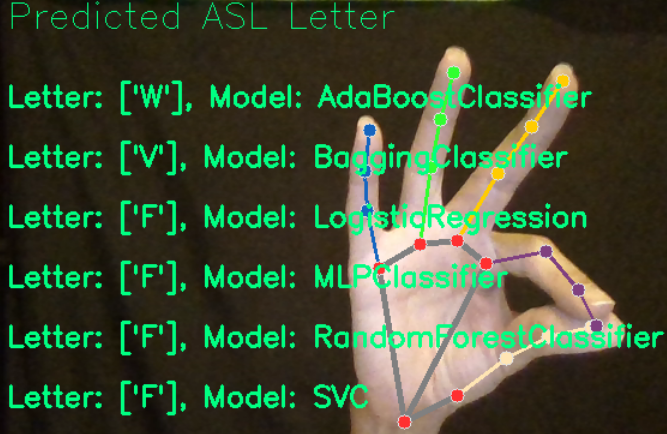

## G

![Screenshot from 2024-11-09 13-32-12.png](<attachment:Screenshot from 2024-11-09 13-32-12.png>)

Predicted Letter: ['L'], Model: AdaBoostClassifier \
Predicted Letter: ['V'], Model: BaggingClassifier \
Predicted Letter: ['G'], Model: LogisticRegression \
Predicted Letter: ['G'], Model: MLPClassifier \
Predicted Letter: ['T'], Model: RandomForestClassifier \
Predicted Letter: ['Z'], Model: SVC

Correct prediction: \
LogisticRegression model, SVC model
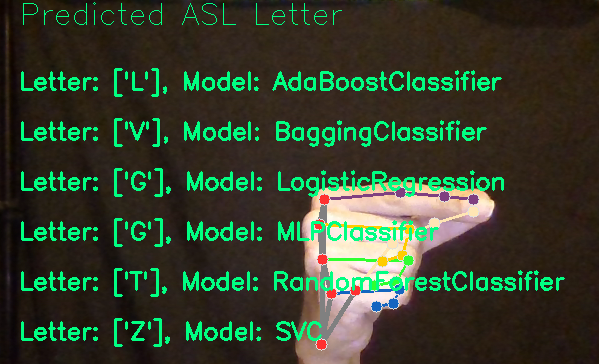

## I

![Screenshot from 2024-11-09 13-33-26.png](<attachment:Screenshot from 2024-11-09 13-33-26.png>)

Predicted Letter: ['L'], Model: AdaBoostClassifier \
Predicted Letter: ['M'], Model: BaggingClassifier \
Predicted Letter: ['I'], Model: LogisticRegression \
Predicted Letter: ['O'], Model: MLPClassifier \
Predicted Letter: ['O'], Model: RandomForestClassifier \
Predicted Letter: ['I'], Model: SVC

Correct prediction: \
LogisticRegression model, SVC model
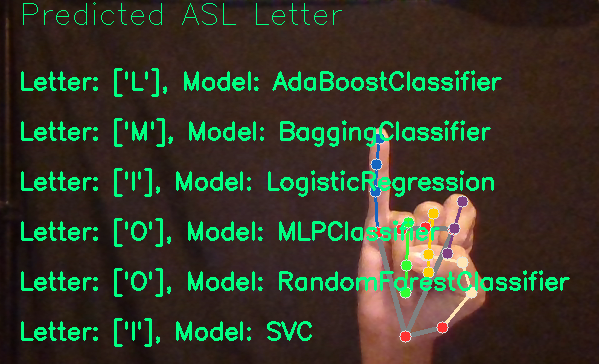

## L

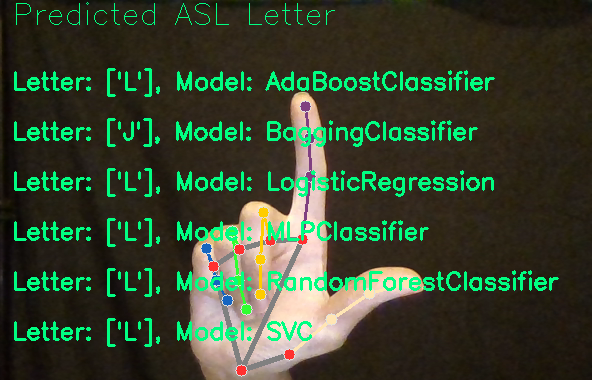

Predicted Letter: ['L'], Model: AdaBoostClassifier \
Predicted Letter: ['J'], Model: BaggingClassifier \
Predicted Letter: ['L'], Model: LogisticRegression \
Predicted Letter: ['L'], Model: MLPClassifier \
Predicted Letter: ['L'], Model: RandomForestClassifier \
Predicted Letter: ['L'], Model: SVC

Correct prediction: \
All models except for BaggingClassifier

## Y

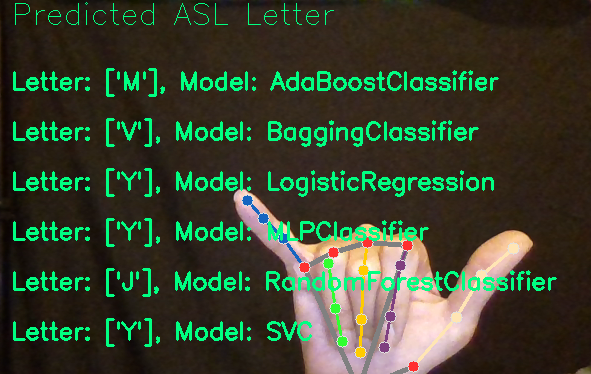

Predicted Letter: ['M'], Model: AdaBoostClassifier \
Predicted Letter: ['V'], Model: BaggingClassifier \
Predicted Letter: ['Y'], Model: LogisticRegression \
Predicted Letter: ['Y'], Model: MLPClassifier \
Predicted Letter: ['J'], Model: RandomForestClassifier \
Predicted Letter: ['Y'], Model: SVC

Correct prediction: \
LogisticRegression model, MLPClassifier, SVC

# Conclusion:

Best candidate models:

- LogisticRegression model
- SVM model

(predict more accurately most of the time)